# Assignment 4: Preprocessing and Visualizing Text Data


#### References: 
1. [Document Similarity using NLTK and Scikit-Learn](http://www.cs.duke.edu/courses/spring14/compsci290/assignments/lab02.html)
2. [Turn Your Twitter Timeline into a Word Cloud](http://sebastianraschka.com/Articles/2014_twitter_wordcloud.html#b-creating-the-word-cloud-b-creating-the-word-cloud)
3. [Processing Raw Text](http://www.nltk.org/book/ch03.html)
4. [The Vector Space Model of text from Stanford](https://stanford.edu/~rjweiss/public_html/IRiSS2013/text2/notebooks/tfidf.html)


### Introduction
The most important source of texts is undoubtedly the Web. In this notebook, we will learn about the basic steps of text pre-processing. We will learn reading text documents from the Web and preprocessing and visualizing these documents. 



**Outlines**
* Read text document
* Tokenize the text
* Remove Punctuations
* Eliminate Stopwords
* Stemming and Lemmatizing text
* Calulate the term frequency in the text
* Generate word clouds from text documents

### Before Starting

Run the following commands:
* `pip install data science` to download python's Data Science package
* `pip install nltk`, NLTK (Natural Language Toolkit) makes it easy to convert documents-as-strings into word-vectors, a process called tokenizing
* `pip install git+git://github.com/amueller/word_cloud.git` to import word cloud library


In [3]:
!pip install data science 
!pip install nltk      #Natural Language Toolkit
!pip install git+git://github.com/amueller/word_cloud.git #WordCloud module


  Using cached data-0.4.tar.gz
  Could not find a version that satisfies the requirement science (from versions: )
No matching distribution found for science
  Cloning git://github.com/amueller/word_cloud.git to /tmp/pip-v6abj89j-build
  Running setup.py install for wordcloud ... done


## Importing libraries

In [10]:
from datascience import * #datascience library because we will use tables
import numpy as np 
%matplotlib inline 
import matplotlib.pyplot as plots #We will use matplotlib library for plotting
plots.style.use('fivethirtyeight')

#To start with, let's import NLTK, the canonical library for NLP in Python
from nltk import *
from nltk import word_tokenize  
from nltk.corpus import stopwords
import nltk
import string
#Punkt tokenizer is the magical unsupervised sentence boundary detection. 
#Punkt knows that the periods in Mr. Smith and Johann S. Bach do not mark sentence boundaries. 
nltk.download('punkt')

from urllib.request import urlopen 
import re                                                                                                                
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

[nltk_data] Downloading package punkt to /srv/app/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Reading Text from the Web

**Gutenberg Corpus**: Project Gutenberg is a website that publishes public domain books online.

[NLTK](http://www.nltk.org/) includes a small selection of texts from the Project Gutenberg electronic text archive, which contains some 25,000 free electronic books, hosted at http://www.gutenberg.org/. We begin by reading a text of Little Women by Louisa May Alcott through passing the URI of this book. Little Women is a story of four sisters growing up together during the civil war. In this book, chapter numbers are spelled out and chapter titles are written in all capital letters.

In [59]:
#Read text data of the book from the Web
little_women_url = 'http://www.gutenberg.org/cache/epub/35534/pg35534.txt'
#Get the text content of the Web resource
little_women_text = read_url(little_women_url)


Let us prints the first 2000 words of the book

In [60]:
little_women_text[:2000]

'\ufeffProject Gutenberg\'s How to be Happy Though Married, by Edward John Hardy This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org Title: How to be Happy Though Married Being a Handbook to Marriage Author: Edward John Hardy Release Date: March 9, 2011 [EBook #35534] Language: English *** START OF THIS PROJECT GUTENBERG EBOOK HOW TO BE HAPPY THOUGH MARRIED *** Produced by Colin Bell, Christine P. Travers and the Online Distributed Proofreading Team at http://www.pgdp.net (This file was produced from images generously made available by The Internet Archive) [Transcriber\'s note: The author\'s spelling has been maintained. + signs around words indicate the use of a different font in the book. In the word "Puranic", the "a" is overlined in the book.] _HOW TO BE HAPPY THOUGH MARRIED._ PRESS NOTIC

## Tokenization

Given a character sequence and a defined document unit, tokenization is the task of chopping it up into pieces, called tokens.

Before manipluating text, there are issues that need to be resolved: 
* Capitalization: Qui vs. qui 
* Punctuation: St. John vs. St John
* Stopwords: "the" and "a"

Here we first convert the text into lower case and then turn into a list of tokens. 


In [5]:
#import word_tokenize
import nltk
from nltk import word_tokenize
import string
nltk.download('punkt')
#make the text lower case
little_women_text_lower = little_women_text.lower()


[nltk_data] Downloading package punkt to /srv/app/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
#Convert the text to a list of tokens
tokens = nltk.word_tokenize(little_women_text_lower)
#print first 10 tokens 
tokens[:10] 

['\ufeffthe',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'little',
 'women',
 ',',
 'by',
 'louisa']

## Removing punctuation

Punctuation can help with tokenizers, but once you've done that, there's no reason to keep it around. There are tons of ways to remove punctuation. Now, we'll remove the punctions from the tokened list to avoid skewed results.


In [16]:
tokens = [''.join(c for c in tokens if c not in string.punctuation) for tokens in tokens] 
#string.punctutation includes all kinds of punctuations
tokens = [tokens for tokens in tokens if tokens]
tokens[:10]

['\ufeffthe',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'little',
 'women',
 'by',
 'louisa',
 'may']

In [8]:
from collections import Counter
count = Counter(tokens)
count_10 = count.most_common(10) # Most common words before removing the stop words
count_10

[('and', 8109),
 ('the', 7695),
 ('to', 5149),
 ('a', 4517),
 ('i', 4003),
 ('of', 3518),
 ('her', 3245),
 ('it', 2773),
 ('in', 2501),
 ('you', 2446)]

## Remove Stopwords 

Stopwords are the most frequent words in any given language, e.g., "the", "a", "that", etc. Stopwords do not contain important significance to be used in Search Queries. Hence, we remove them before doing the data analysis to ensure that results are not skewed.

In [11]:
#NTKL contains stopwords for all major languages
#Filter out stopwords
filtered = [w for w in tokens if not w in stopwords.words('english')] 
count = Counter(filtered)
count_10= count.most_common(10) #Most common words before removing the stop words
count_10

[('nt', 1675),
 ('jo', 1362),
 ('said', 827),
 ('little', 731),
 ('one', 719),
 ('meg', 686),
 ('amy', 652),
 ('laurie', 598),
 ('like', 583),
 ('would', 539)]

## Stemming and Lemmatization

If you have taken linguistics, you may be familiar with morphology. This is the belief that words have a root form. For example, if you are trying to identify the topic of a document, counting 'running', 'runs', 'ran', and 'run' as four separate words is not useful. If you want to get to the basic term meaning of the word, you can try applying a stemmer or lemmatizer. Reducing words to their stems is a process called **stemming**. 
**Lemmatization** approach depends on using an English word bank like WordNet to call dictionary lookups on word forms.
Whereas stemming just algorithmically cuts off the ends of words, lemmatization takes into account the grammatical and morphological properties of the word. More on the two [here](https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html). 


In [57]:
#We will do stemming using NLTK's Porter Stemmer.
from nltk.stem.porter import PorterStemmer

stemmed = PorterStemmer()
stemmed.stem("women")

'women'

**Question 1** Try out stemming these words: cats, eat, eats, ate, vacation, cylinder, cylindrical, embarassed, running, aardwolves

In [ ]:
#Add you code here


In [58]:
#Generate stems for Little Women text using PorterStemmer
from nltk.stem.porter import PorterStemmer
def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

#We pass the filetered tokens and the type of stemmer to stem_token function
stemmed = stem_tokens(filtered, PorterStemmer())
count1 = Counter(stemmed)
count_10 = count1.most_common(10) #Most common words before removing the stop words
count_10


[('one', 365),
 ('wife', 356),
 ('life', 275),
 ('husband', 259),
 ('man', 246),
 ('would', 237),
 ('may', 234),
 ('said', 227),
 ('love', 224),
 ('marri', 218)]

In [12]:
#from nltk.stem.porter import WordNetLemmatizer
nltk.download('wordnet')
wordnet = nltk.WordNetLemmatizer()
wordnet.lemmatize('women')


[nltk_data] Downloading package wordnet to /srv/app/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'woman'

**Question 2** Try out Lemmatizing these words: cats, eat, eats, ate, vacation, cylinder, cylindrical, embarassed, running, aardwolves

In [ ]:
#Add you code here


**Question 3** Based on the results of stemming and lemmatizing, list the pros and cons for each method. 

In [ ]:
#Add your answers here. Note that you need to change the cell type to markdown.

## Word Count

In [ ]:
count = Counter(stemmed)
#Array for most common words
most_common_words = [word for word, word_count in Counter(stemmed).most_common(10)] 
#Frequency of the most common words
frequency = [word_count for word, word_count in Counter(stemmed).most_common(10)] 
#Make a table for words and their frequencies
frequency_table = Table().with_columns('Words', most_common_words, 'Frequency', frequency)
frequency_table

In [ ]:
#Plot the most common 10 words
frequency_table.barh('Words', 'Frequency')

**Question 4** Plot the most common 10 words in Little Women book, but instead of using PorterStemmer, use WordNetLemmatizer. Hint: you can use the same stemming function, but you will change stemming to lemmatizing 

In [17]:
nltk.download('wordnet')
wordnet = nltk.WordNetLemmatizer()

def lemmatized_tokens(tokens, lemmatizer):
    lemmatized = []
    # Generate for loop that takes tokens and appends its original form to the lemmatized list

# Pass the filetered tokens and the type of stemmer to lemmatized_tokens function
lemmatized = lemmatized_tokens(filtered, nltk.WordNetLemmatizer())

#Add the code that calculate the most frequent words below. Note that you can follow our previous example.



[nltk_data] Downloading package wordnet to /srv/app/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Question 5** Do you see any difference between the most frequent 10 words generated using stemming and the most frequent 10 words generated using lemmatizing? Explain.

In [ ]:
#Add your answers here. Note that you need to change the cell type to markdown.

## Word Cloud generator

Now we use the "WordCloud" library to generate an automatic wordcloud using the most words in the book. Check out more masks on the library site: http://amueller.github.io/word_cloud/index.html.

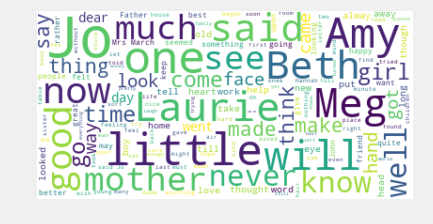

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#generating and formatting of wordcloud from the book text
wordcloud = WordCloud(background_color='white',
                      max_words=200,
                      max_font_size=60, 
                      random_state=42).generate(little_women_text) 


plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

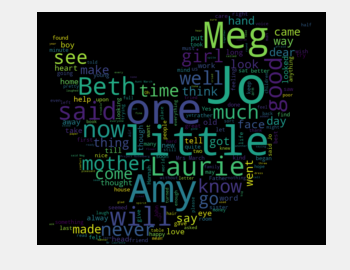

In [20]:
import matplotlib.pyplot as plt
from scipy.misc import imread
from wordcloud import WordCloud, STOPWORDS

#Reading the mask image
#You have to download the mask image and upload it to your hub to avoid errors
twitter_mask = imread('twitter_mask.png')
#twitter_mask = imread('sphx_glr_masked_002.png')
#http://amueller.github.io/word_cloud/_images/sphx_glr_masked_002.png

#Formatting the wordcloud
wordcloud = WordCloud(background_color='black',
                      max_words=200,
                      stopwords=STOPWORDS,
                      random_state=42,
                      mask=twitter_mask).generate(little_women_text)  #pass the text book to the wordcould module
#show
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Using visualization to get insight from text 

We can visualize other feature to get insight about text data. If you haven't taken data 8, I recommend that you scan Chapter 2 - 7 of [this](https://www.inferentialthinking.com) book. 

In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from urllib.request import urlopen 
import re
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

#Read text data of the book from the Web
little_women_url = 'http://data8.org/materials-fa17/lec/little_women.txt'
#Get the text content of the Web resource
little_women_text = read_url(little_women_url)


# The chapters of Little Women, in a table

little_women_chapters = little_women_text.split('CHAPTER ')[1:]
#Table().with_column('Text', little_women_chapters)
#print the text of the second chapter
little_women_chapters[1]


'TWO A MERRY CHRISTMAS Jo was the first to wake in the gray dawn of Christmas morning. No stockings hung at the fireplace, and for a moment she felt as much disappointed as she did long ago, when her little sock fell down because it was crammed so full of goodies. Then she remembered her mother\'s promise and, slipping her hand under her pillow, drew out a little crimson-covered book. She knew it very well, for it was that beautiful old story of the best life ever lived, and Jo felt that it was a true guidebook for any pilgrim going on a long journey. She woke Meg with a "Merry Christmas," and bade her see what was under her pillow. A green-covered book appeared, with the same picture inside, and a few words written by their mother, which made their one present very precious in their eyes. Presently Beth and Amy woke to rummage and find their little books also, one dove-colored, the other blue, and all sat looking at and talking about them, while the east grew rosy with the coming day.

In [ ]:
#Try to print the text of other chapters.
#Add you code here.

We can track the mentions of main characters to learn about the plot of this book as well. 
Laurie is a young man who marries one of the girls in the end. See if you can use the plots to guess which one.


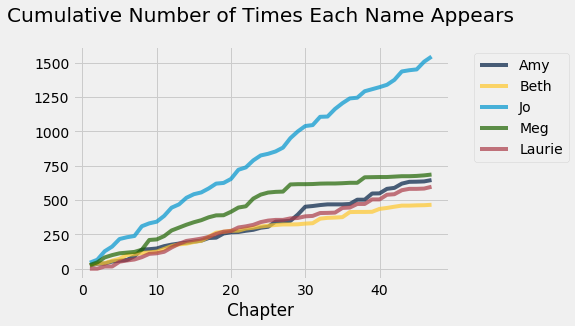

In [2]:
# Counts of names in the chapters of Little Women

counts = Table().with_columns([
        'Amy', np.char.count(little_women_chapters, 'Amy'),
        'Beth', np.char.count(little_women_chapters, 'Beth'),
        'Jo', np.char.count(little_women_chapters, 'Jo'),
        'Meg', np.char.count(little_women_chapters, 'Meg'),
        'Laurie', np.char.count(little_women_chapters, 'Laurie'),

    ])

# Plot the cumulative counts.

cum_counts = counts.cumsum().with_column('Chapter', np.arange(1, 48, 1))
cum_counts.plot(column_for_xticks=5)
plots.title('Cumulative Number of Times Each Name Appears', y=1.08);

The protagonist Jo interacts with her sisters Meg, Beth, and Amy regularly, up until Chapter 27 when she moves to New York alone.



** Question 6 ** Generate wordclouds for each of any five chapters of Little Women book? Do you see any difference in the generated wordclouds?

In [ ]:
## Your answer

#Read text data of the book from the Web
little_women_url = 'http://data8.org/materials-fa17/lec/little_women.txt'
#Get the text content of the Web resource
little_women_text = read_url(little_women_url)


#Split the text by chapters 
#read the text of chapter X


#generate wordcloud from the text of the book



## Reading collections of documents
Another refinement on top of tf is to downscale weights for words that occur in many documents in the corpus and are therefore less informative than those that occur only in a smaller portion of the corpus.
This downscaling is called tf–idf for “Term Frequency times Inverse Document Frequency”.
Both tf and tf–idf can be computed eaisly using scikit-learn tool. Check out the full [tutorial](http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html) on scikit-learn about working with text data. 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
D1 = 'He watches basketball and baseball'
D2 = 'Julie likes to play basketball'
D3 = 'Jane loves to play baseball'
new_docs = [D1,D2 ,D3 ]


def build_lexicon(corpus):
    lexicon = set()
    for doc in corpus:
        lexicon.update([word for word in doc.split()])
    return lexicon
vocabulary = build_lexicon(new_docs)


tfidf_vectorizer = TfidfVectorizer(min_df = 1)
tfidf_matrix = tfidf_vectorizer.fit_transform(new_docs)
print(vocabulary)
tfidf_matrix.todense()


---

## Submitting the assignment

- Save this jupyter notebook as a pdf or html. Click File, Download as, PDF via LaTex (.pdf) or HTML (.html).
- Upload the pdf/html file into bcourses under Assignment 4.